# **Libraries**

In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

First, we should call some variables from data cleaning process.

In [40]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

%store -r cat_columns
cat_columns = cat_columns

# **Descrptive Analysis**

## **Numerical data**

Now, let's analyze the descrptive statistics for quantitative variables. In this section, we will find measurements of central tendency, dispersion and ..... will draw the distribution plot to compare it with the normal distribution.

In [41]:
def kde_plot(x):
    plt.figure(figsize = (12,3))

    sns.distplot(df[x[0]], kde_kws={"lw" : 5}, hist_kws = {'alpha' : 0.25})
    sns.despine(left = True)

    mean = df[x[0]].mean()
    median = df[x[0]].median()

    plt.axvline(mean, color = 'black', linestyle = 'dashed')
    plt.axvline(median, color = 'green', linestyle = 'solid')
    plt.xlabel('')
    plt.ylabel('')

    return plt.show()

Now we can see the statical interpretation for quantitative variables:

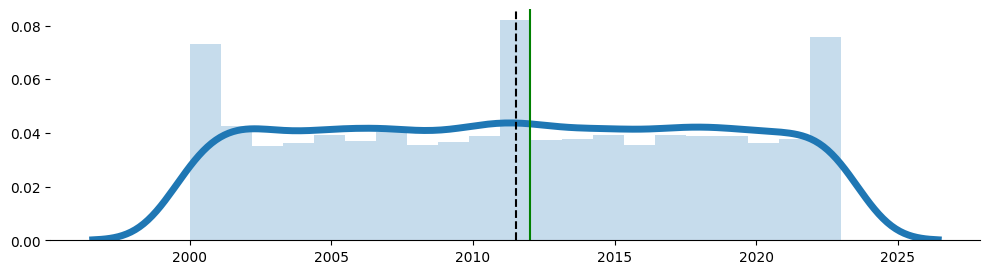

In [42]:
kde_plot([numeric_columns[0]]) #Year

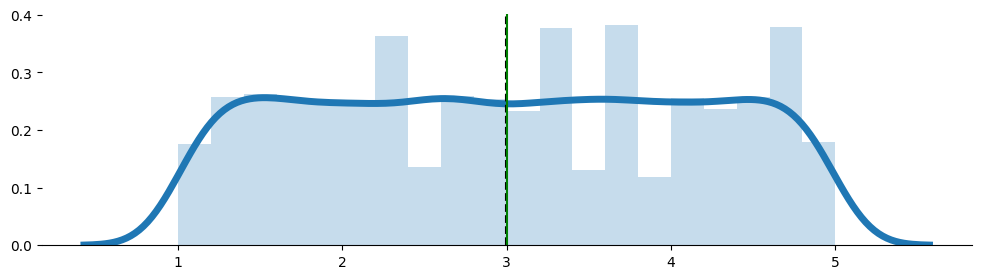

In [43]:
kde_plot([numeric_columns[1]]) #EngineSize

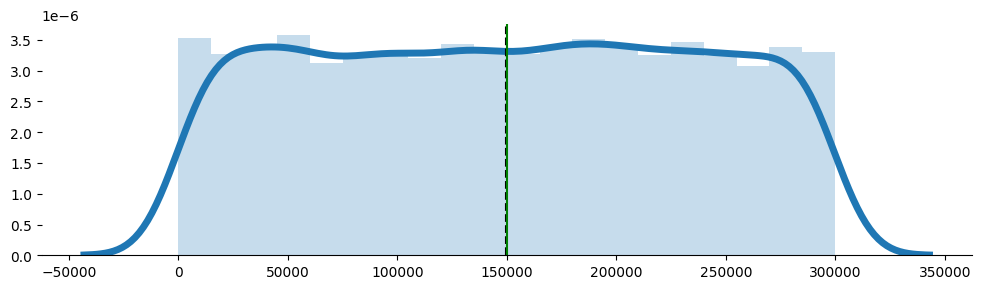

In [44]:
kde_plot([numeric_columns[2]]) #Mileage

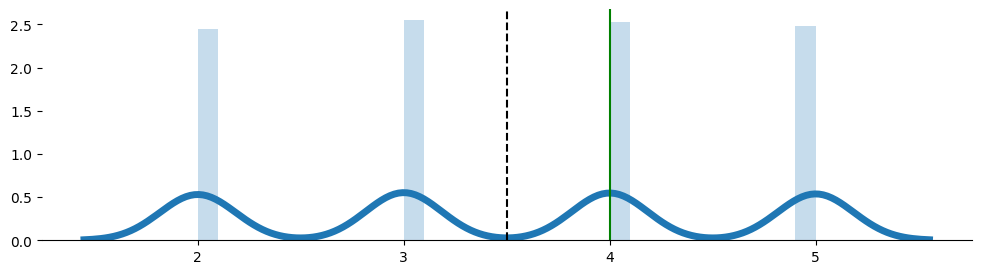

In [45]:
kde_plot([numeric_columns[3]]) #Doors

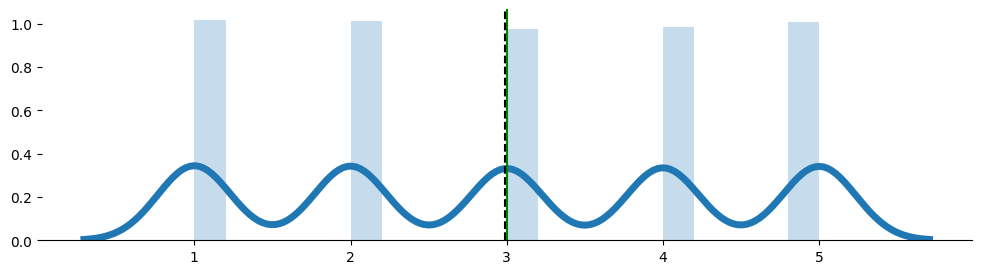

In [46]:
kde_plot([numeric_columns[4]]) #Owner

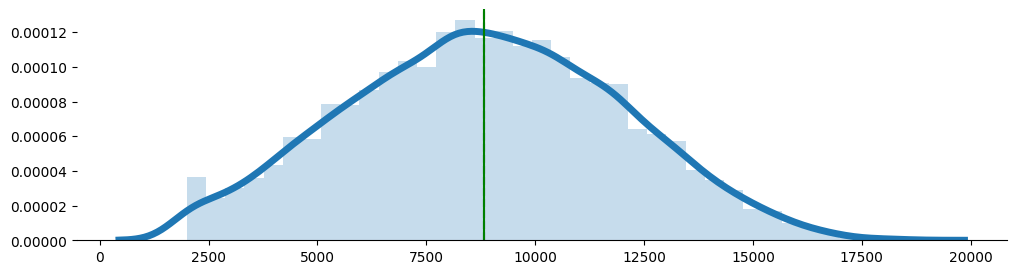

In [47]:
kde_plot([numeric_columns[5]]) #Price

None of the above columns doesn't need any transformation in later.

## **Categorical Data**

Here, we can find the mode of categorical columns to see which category repeated more than rest.

In [29]:
print(cat_columns[0], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[1], '->' , df[cat_columns[1]].mode()[0])
print(cat_columns[2], '->' , df[cat_columns[2]].mode()[0])
print(cat_columns[3], '->' , df[cat_columns[3]].mode()[0])


Brand -> Audi
Model -> Accord
Fuel -> Electric
Transmission -> Manual


# **Correlation Analysis**

In this section, I will explore the relationship between various factors and price. Since price is a crucial aspect for each car, it is important to exam.. variables may be correlated with it. To accompolish this, we will consider two different approachs. The first approach involves analyzing the correct numeric and price using **Pearson correlation**. The second approach will access the correlation between categorical variables and .. **anova test**.

## **Numerical Data (Pearson)**

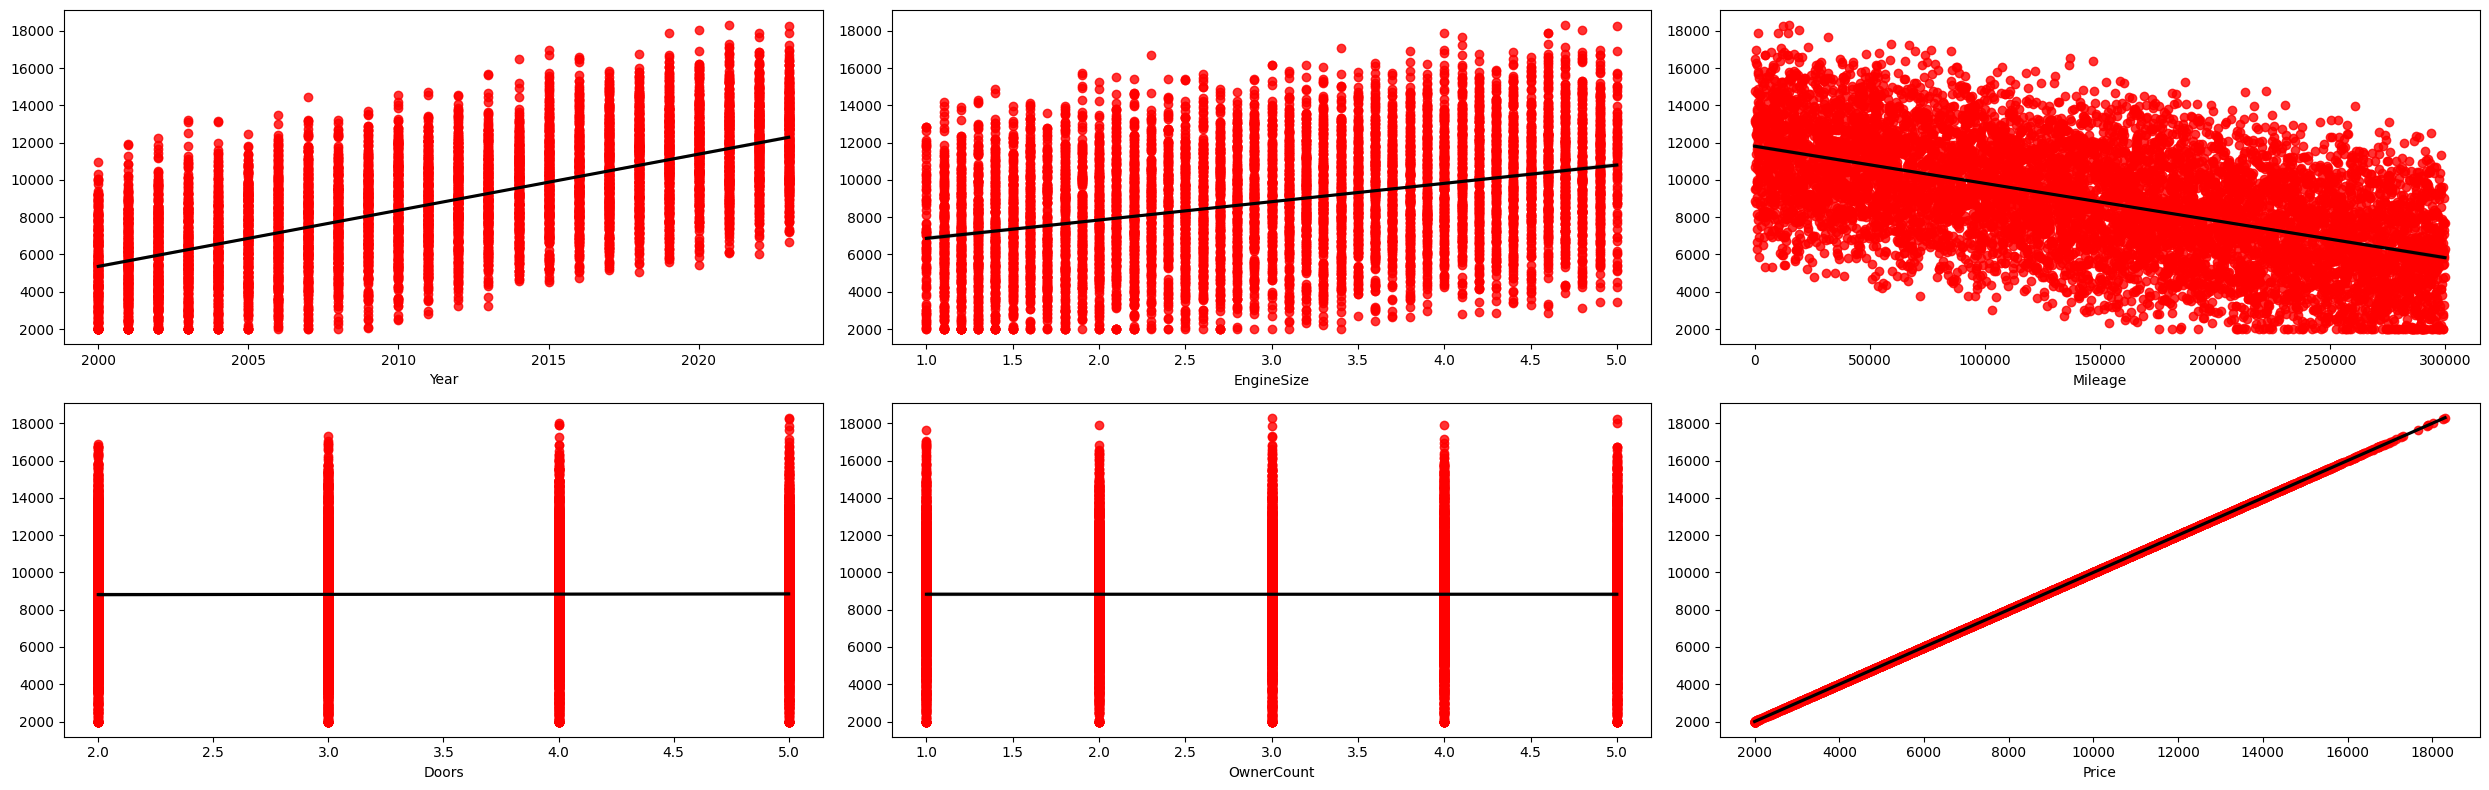

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, 
                y='Price', 
                data=df, 
                ax=axes[i], 
                scatter_kws={"color" : "red"}, 
                line_kws={"color" : "black"})
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


- Newer **models** have higher price and they have **positive** relationship.
- The cars with bigger **Engine_Size** have higher price and they have positive relationship.
- The cars with more **Mileage** have lower price and they have **negative** relationship.

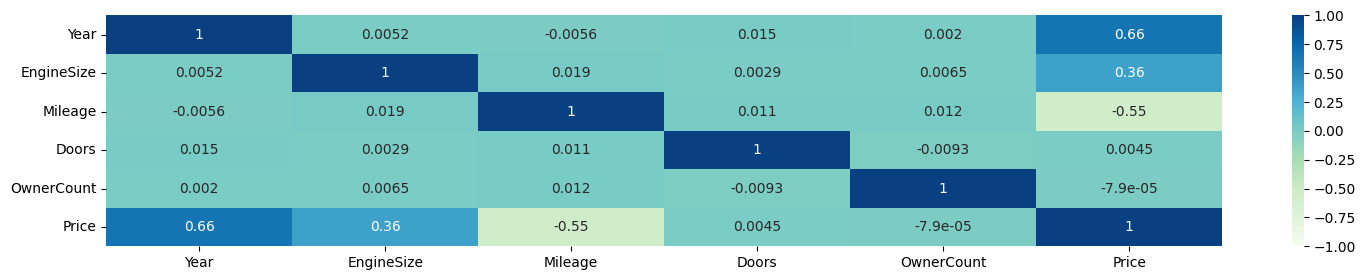

In [49]:
pearson_cor = df[numeric_columns].corr(method = 'pearson')
plt.figure(figsize = (18, 3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

## **Categorical Data(ANOVA)**

For categorical variables, the first step is to determine whether a specific categorical variable has an impact on price, meaning we need to assess its significance. To do this, we conduct an **ANOVA test to compare the differeces between means**. After identifying the significant variables, we perform pairwise descriptive analysis for the categories within the relevant categorical variable, allowing us to compare their their effects on price.

In [50]:
for i in cat_columns:
    formula = 'Price ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value for Price ~ {}: {}'.format(i , p_value))

P-value for Price ~ Brand: 0.1831756268400974
P-value for Price ~ Model: 0.5977964773742497
P-value for Price ~ Fuel: 1.1608569649165184e-129
P-value for Price ~ Transmission: 6.731887149610408e-116


According to the results, we can come up that:

- **Fuel** and **Transmission** are significant to explain the price of car, because the p-values is less than 0.05 and we reject null hypothesis.
- However, **Brand** and **Model** might not bring posiive impact on our model.

So, in the next step we want to see for each label in the above categorical variables, which of them has the most impact on the price. Thus, i make a function to calculate the mean for each label in every single categorical variable(just the first 5 labels in the terms of strength). 

In [52]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by  = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)

    return mean_by.head(5)

In [53]:
mean_pairwise(cat_columns[0]) #Brand

,Price
Brand,
Chevrolet,9018.451815
Audi,8931.886016
Volkswagen,8901.128019
Mercedes,8892.547554
Kia,8885.963731


In [55]:
mean_pairwise(cat_columns[1])  #Model

,Price
Model,
Tiguan,9146.532423
Impala,9094.073944
Equinox,9093.704453
Q5,9028.094406
Corolla,8995.060377


In [56]:
mean_pairwise(cat_columns[2])  #Fuel

,Price
Fuel,
Electric,10061.022662
Hybrid,9094.456689
Diesel,8091.958829
Petrol,8017.726901


In [57]:
mean_pairwise(cat_columns[3]) #Transmission

,Price
Transmission,
Automatic,9954.639456
Manual,8338.461027
Semi-Automatic,8204.673971
